In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [11]:
df_twitter_stock = yf.Ticker("TWTR")
df_twitter_stock = df_twitter_stock.history(period='max')
df_twitter_stock = df_twitter_stock.reset_index(level=0)
df_twitter_stock = df_twitter_stock[["Date", "Open", "High", "Low", "Close"]]

df_twitter_stock = (df_twitter_stock
  .assign(Open = df_twitter_stock.Open.fillna(0).astype('float16'))
  .assign(High = df_twitter_stock.High.fillna(0).astype('float16'))
  .assign(Low = df_twitter_stock.Low.fillna(0).astype('float16'))
  .assign(Close = df_twitter_stock.Close.fillna(0).astype('float16'))
)

df_twitter_stock = df_twitter_stock.loc[(df_twitter_stock["Date"] >= "2021-01-01 00:00:00-00:00") 
                    & (df_twitter_stock["Date"] <= "2022-12-31 00:00:00-00:00")]

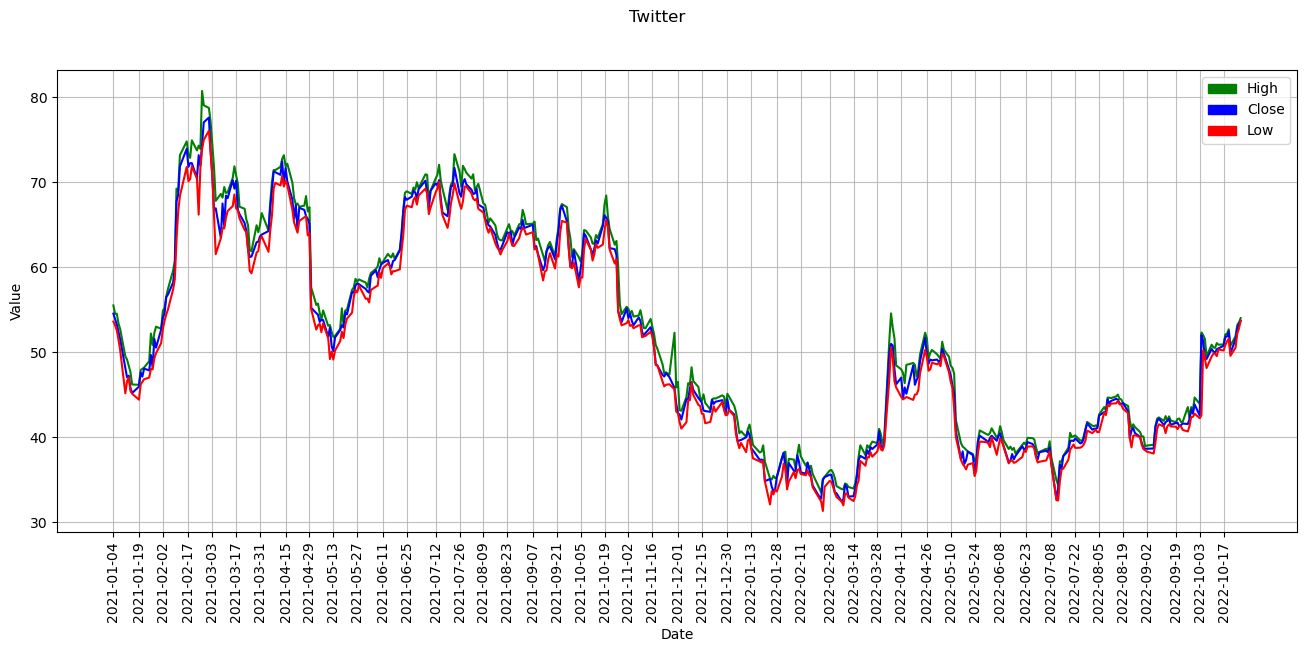

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (16, 6))
fig.suptitle("Twitter")

plt.plot(df_twitter_stock["Date"], df_twitter_stock["High"], color='green')
plt.plot(df_twitter_stock["Date"], df_twitter_stock["Close"], color='blue')
plt.plot(df_twitter_stock["Date"], df_twitter_stock["Low"], color='red')
plt.xticks(df_twitter_stock.iloc[::10, :]["Date"])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.grid(alpha = 0.8)

for label in ax.get_xticklabels():
  label.set_rotation(90)

green_patch = mpatches.Patch(color='green', label='High')
blue_patch = mpatches.Patch(color='blue', label='Close')
red_patch = mpatches.Patch(color='red', label='Low')

plt.legend(handles=[green_patch, blue_patch, red_patch])
plt.show()